In [1]:
import pandas as pd
data = pd.read_csv("Data_MLB_2025_StatcastPostseason_PitchByPitch_20251102a.csv")

In [2]:
# need features that are available before or during the pitch - or else data leakage
# I also made a heatmap and dropped features that were repetitve w each other (like inning and at_bat_number, 
columns_to_drop = [
    'game_year', 'game_date', 'player_name', 'pitcher', 'batter', 
    'events', 'description', 'des','game_pk', 'release_speed', 'release_pos_y',
    'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated',
    'zone', 'game_type', 'home_team', 'away_team', 'hit_location', 'bb_type', 'delta_home_win_exp', 'delta_run_exp',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'if_fielding_alignment', 'of_fielding_alignment',
    'outs_when_up', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'sz_top', 'sz_bot',
    'fielder_2', 'fielder_2.1', 'fielder_2.2', 'fielder_2.3', 'fielder_3', 'inning', 'inning_topbot',
    'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'effective_speed',
    'umpire', 'sv_id', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'spin_dir',
    'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value',
    'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle',  'post_away_score', 'post_home_score',
    'post_bat_score', 'post_fld_score', 'home_score', 'away_score', 'bat_speed', 'swing_length', 'pitch_name'
]

data = data.drop(columns=columns_to_drop)

print(data.columns)
pd.set_option('display.max_columns', None)
print(data.head())



Index(['balls', 'strikes', 'at_bat_number', 'pitch_number', 'pitch_type',
       'release_pos_x', 'release_pos_z', 'stand', 'p_throws', 'type', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'release_spin_rate',
       'release_extension', 'bat_score', 'fld_score', 'spin_axis'],
      dtype='object')
   balls  strikes  at_bat_number  pitch_number pitch_type  release_pos_x  \
0      0        0             73             1         SL          -0.30   
1      1        0             73             2         FC          -0.06   
2      1        1             73             3         SL          -0.18   
3      1        2             73             4         SL          -0.11   
4      1        2             73             5         FC          -0.09   

   release_pos_z stand p_throws type       vx0         vy0       vz0  \
0           6.43     R        R    B  0.109715 -133.806972 -1.288816   
1           6.56     R        R    S -0.626523 -141.845059 -6.110725   
2           6.31     R    

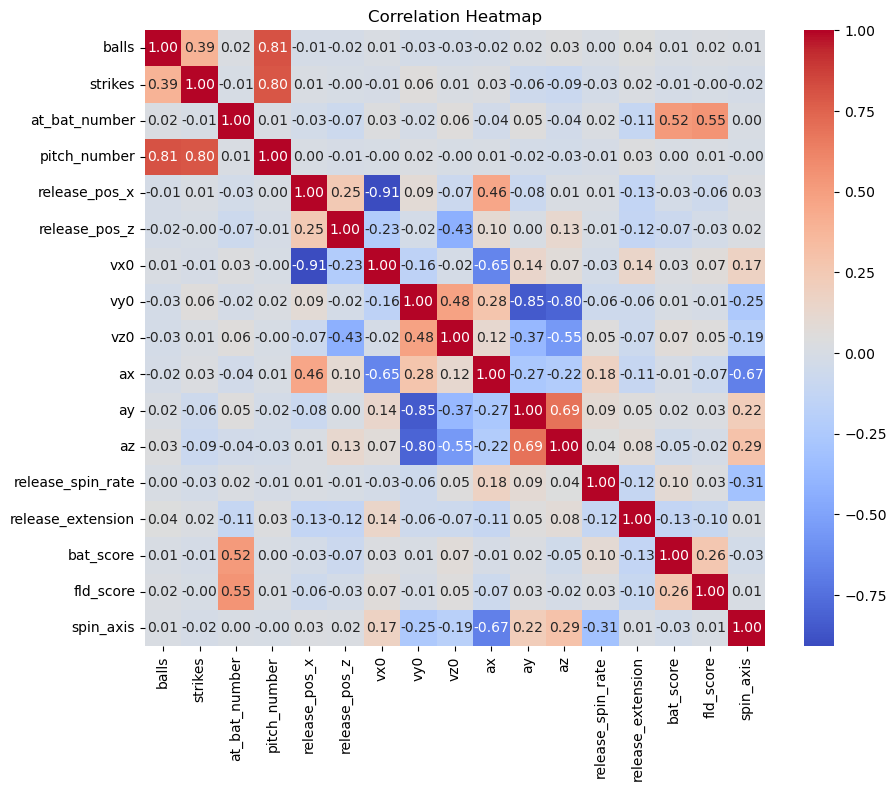

21


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# compute correlation matrix
corr = data.corr(numeric_only=True)

# plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print(len(data.columns))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("feature_visualizations", exist_ok=True)

# Separate numeric and categorical features
numeric_features = [
       'balls', 'strikes', 'at_bat_number', 'pitch_number', 
       'release_pos_x', 'release_pos_z', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'release_spin_rate',
       'release_extension', 'bat_score', 'fld_score', 'spin_axis'
]

categorical_features = ['stand', 'p_throws', 'type', 'pitch_type']  # type is the target

# Numeric Features: Histograms
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f"feature_visualizations/{col}_hist.png")
    plt.close()

# Categorical Features: Countplots
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f"feature_visualizations/{col}_count.png")
    plt.close()

# Correlation Heatmap for numeric features 
plt.figure(figsize=(12,10))
corr = data[numeric_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.savefig("feature_visualizations/correlation_heatmap.png")
plt.close()


c:\Users\herro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y = data['type']
X = data.drop(columns=['type'])

categorical_features = ['stand', 'p_throws', 'pitch_type']
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# ColumnTransformer for encoding
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Transform the features
X_encoded = encoder.fit_transform(X)

# Split into training and validation (10% for validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.1, random_state=42, stratify=y
)

# Convert NumPy array back to DataFrame
X_train_df = pd.DataFrame(X_train)
X_val_df = pd.DataFrame(X_val)
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)

# Save to CSV
X_train_df.to_csv('X_train.csv', index=False)
X_val_df.to_csv('X_val.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_val_df.to_csv('y_val.csv', index=False)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

dt_depths = [3, 5, 7, 9, None]
rf_estimators = [50, 100, 200, 300]

# k-fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_scores = []
for depth in dt_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=kf, scoring='accuracy')
    dt_scores.append(np.mean(scores))

plt.figure(figsize=(6,4))
plt.plot([d if d is not None else 10 for d in dt_depths], dt_scores, marker='o')  # None replaced with 10 for plotting
plt.title('Decision Tree: Max Depth vs CV Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.tight_layout()
plt.savefig('dt_cv_plot.png')
plt.close()

rf_scores = []
for n in rf_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')
    rf_scores.append(np.mean(scores))

plt.figure(figsize=(6,4))
plt.plot(rf_estimators, rf_scores, marker='o')
plt.title('Random Forest: n_estimators vs CV Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Mean CV Accuracy')
plt.tight_layout()
plt.savefig('rf_cv_plot.png')
plt.close()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\herro\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# WIP

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=9, random_state=42)

# Measure training time
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_train_time = time.time() - start_time

# Predict on validation set
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate performance
dt_accuracy = accuracy_score(y_val, y_val_pred_dt)
dt_report = classification_report(y_val, y_val_pred_dt)

print(f"Decision Tree Training Time: {dt_train_time:.4f} seconds")
print(f"Decision Tree Validation Accuracy: {dt_accuracy:.4f}")
print("Decision Tree Classification Report:")
print(dt_report)


# Random Forest
start_rf = time.time()

rf_model = RandomForestClassifier(n_estimators=rf_n_estimators, random_state=42)
rf_model.fit(X_train, y_train)

end_rf = time.time()
rf_runtime = end_rf - start_rf

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Accuracy
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)

print(f"Random Forest Training Runtime: {rf_runtime:.2f} seconds")
print(f"Random Forest Accuracy - Training: {train_acc_rf:.3f}, Validation: {val_acc_rf:.3f}")


Decision Tree Training Runtime: 0.15 seconds
Decision Tree Accuracy - Training: 0.602, Validation: 0.535
Random Forest Training Runtime: 14.68 seconds
Random Forest Accuracy - Training: 1.000, Validation: 0.612


In [ ]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

ks_to_test=[3,5,7,9,11]

# k-fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_accuracies=[]

for k in ks_to_test:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    knn_accuracies.append(np.mean(scores))


plt.figure(figsize=(6,4))
plt.plot(ks_to_test, knn_accuracies, marker='o')
plt.title('K-Nearest Neighbors: K-value vs CV Accuracy')
plt.xlabel('K-value')
plt.ylabel('CV Accuracy')
plt.tight_layout()
plt.savefig('dt_cv_plot.png')
plt.close()

In [ ]:
knn_best_k = ks_to_test[np.argmax(knn_accuracies)]
knn_model = KNeighborsClassifier(n_neighbors=knn_best_k)


# Measure training time
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_train_time = time.time() - start_time

# Predict on validation set
y_val_pred_knn = knn_model.predict(X_val)

# Evaluate performance
knn_accuracy = accuracy_score(y_val, y_val_pred_knn)
knn_report = classification_report(y_val, y_val_pred_knn)

print(f"KNN Training Time: {knn_train_time:.4f} seconds")
print(f"KNN Validation Accuracy: {knn_accuracy:.4f}")
print("KNN Classification Report:")
print(knn_report)


In [ ]:
#SVM

cs_to_test = [0.1, 1, 10, 100]
svm_accuracies=[]
for c in cs_to_test:
    svm = SVC(C=c, kernel='rbf', random_state=42)
    scores = cross_val_score(svm, X_train, y_train, cv=kf, scoring='accuracy')
    svm_accuracies.append(np.mean(scores))

plt.figure(figsize=(6,4))
plt.plot(cs_to_test, svm_accuracies, marker='o')
plt.title('SVM: C-value vs CV Accuracy')
plt.xlabel('C-value')
plt.ylabel('CV Accuracy')
plt.tight_layout()
plt.savefig('svm_cv_plot.png')
plt.close()



In [ ]:
svm_best_c = cs_to_test[np.argmax(svm_accuracies)]
svm_model = SVC(C=svm_best_c, kernel='rbf', random_state=42)

# Measure training time
start_time = time.time()
svm_model.fit(X_train, y_train)
svm_train_time = time.time() - start_time       

# Predict on validation set
y_val_pred_svm = svm_model.predict(X_val)   
# Evaluate performance
svm_accuracy = accuracy_score(y_val, y_val_pred_svm)
svm_report = classification_report(y_val, y_val_pred_svm)
print(f"SVM Training Time: {svm_train_time:.4f} seconds")
print(f"SVM Validation Accuracy: {svm_accuracy:.4f}")
print("SVM Classification Report:")
print(svm_report)


In [ ]:
#Turning it into a binary classification problem

#Recode 'type' so balls and strikes are 'pitches' and everything else is 'in_play'
data['type'] = data['type'].apply(lambda x: 'pitch' if x in ['ball', 'strike'] else 'in_play')

data['type'] = data['type'].astype('category')

#Now, repeat all the steps above with this new binary target variable